In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [14]:
mallCustomers = pd.read_csv("Mall_Customers.csv")

In [15]:
mallCustomers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
mallCustomers.drop("CustomerID", axis=1, inplace=True)

In [19]:
mallCustomers.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
X = mallCustomers.iloc[:, [2,3]]

In [21]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### LETS FIND THE BEST CLUSTER VALUES

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

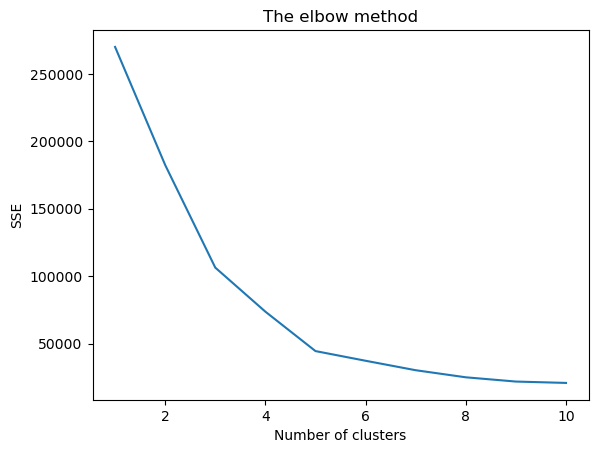

In [22]:
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [23]:
km = KMeans(n_clusters=5)

In [25]:
cl = km.fit_predict(X)
cl

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [26]:
mallCustomers["clusters"] = cl

In [28]:
mallCustomers["clusters"].unique()

array([4, 0, 3, 2, 1])

In [30]:
df1 = mallCustomers[mallCustomers.clusters == 0]
df2 = mallCustomers[mallCustomers.clusters == 1]
df3 = mallCustomers[mallCustomers.clusters == 2]
df4 = mallCustomers[mallCustomers.clusters == 3]
df5 = mallCustomers[mallCustomers.clusters == 4]

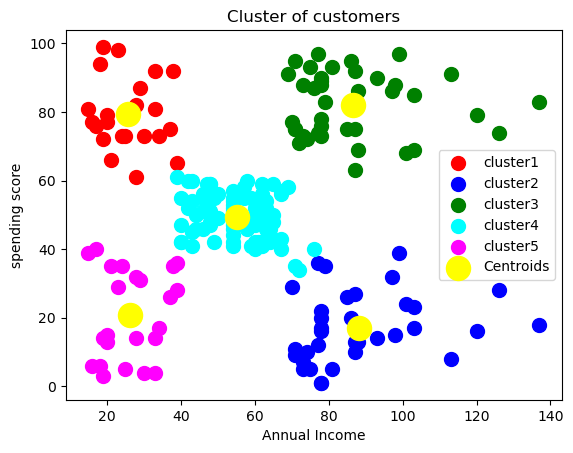

In [37]:
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], s = 100, c = "red", label="cluster1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], s = 100, c = "blue", label="cluster2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], s = 100, c = "green", label="cluster3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], s = 100, c = "cyan", label="cluster4")
plt.scatter(df5["Annual Income (k$)"], df5["Spending Score (1-100)"], s = 100, c = "magenta", label="cluster5")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.legend()
plt.show()